### <span style="color:#845EC2"> <b> Plots for each model </b> </span>

<span style="color:#D65DB1"> <b> Plot 1 </b> </span> : Plot boxplot of the target lengdt default for each global score.
    
    1. For the 3 experiments for each model
    What model had better results when it comes to plotting?

-> Plot over the how many word over and under the target word length was.
    
    1. For the 3 experiments for each model
    What model had better results when it comes to plotting?

Plot 2 -> 

<span style="color:#F9F871"> F9F871 </span>
<span style="color:#FFC75F"> FFC75F </span>
<span style="color:#FF9671"> FF9671 </span>

<span style="color:#FF6F91"> FF6F91 </span>
<span style="color:#D65DB1"> D65DB1 </span>
<span style="color:#845EC2"> 845EC2 </span>


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import self_made_functions as smf
import seaborn as sns
import pandas as pd

# run_for_score_sort(model_name) 
# run_for_score_mixed(model_name) 
# group_by_id(model_name)
# random_shuffel_concat(model_name)

# Load the data
file_name = 'tiny__concatenated_audio_information_scores_id_sorted_v1.csv'
model_name = file_name.split('__')[0]

scores_id_sorted = pd.read_csv(file_name)

<span style="color:#FF6F91"> The deviation in translated string length for each Score </span>

For Whisper model tiny, is the diviation in extra words transcribed big for the lower score, and it gets swamler for hiher score, but then the outliers are way bigger than at the lower scores


Test categories:

1. <span style="color:#FF9671"> Grouping by score, sorted IDs : <code> {model_name}__concatenated_audio_information_scores_id_sorted </code></span>
2. <span style="color:#FFC75F"> Grouping by score, mixed IDs  : <code> {model_name}__concatenated_audio_information_scores_id_mixed </code></span>
3. <span style="color:#F9F871"> Grouping by IDs: sorted scores: <code> {model_name}__concatenated_audio_information_by_id</code> </span>
4. <span style="color:#FF6F91"> Random shuffling: no group    : <code> {model_name}__concatenated_audio_information_no_group_mixed </code></span>

In [54]:
models = ['tiny', 'nb-whisper-tiny', 'nb-whisper-tiny-verbatim',
        'base', 'nb-whisper-base', 'nb-whisper-base-verbatim',
        'medium', 'nb-whisper-medium', 'nb-whisper-medium-verbatim']

different_tests = [
'__concatenated_audio_information_scores_id_sorted', # 1
'__concatenated_audio_information_scores_id_mixed', # 2
'__concatenated_audio_information_by_id', # 3
#__concatenated_audio_information_group_id_sorted_score'
'__concatenated_audio_information_no_group_mixed'] # 4

test_names = ['Grouping by score, sorted IDs ', 
        'Grouping by score, mixed IDs',
        'Grouping by ID: sorted scores',
        'No grouping, mixed IDs']

info_dir ='3x10_Concatenation_information'

# Go through all the models. Make 3 sub-box-plots whit the results from the models, for test 1, 2, and 4. 
# Where x = score and y = length_deviation_words
# Save the box plots in the folder 'box_plots' whit the test name as the name of the file.

In [82]:
t = ['medium', 'nb-whisper-medium', 'nb-whisper-medium-verbatim']
t = ['base', 'nb-whisper-base', 'nb-whisper-base-verbatim']
t = ['tiny', 'nb-whisper-tiny', 'nb-whisper-tiny-verbatim']

for tt in t:
    path = f'{tt}{different_tests[0]}_v1.csv'
    print(path)
    if os.path.exists(path):
        print(f'{tt} exists')
    else:  
        print(f'{tt} does not exist')
        os.makedirs(path)




tiny__concatenated_audio_information_scores_id_sorted_v1.csv
tiny exists
nb-whisper-tiny__concatenated_audio_information_scores_id_sorted_v1.csv
nb-whisper-tiny does not exist
nb-whisper-tiny-verbatim__concatenated_audio_information_scores_id_sorted_v1.csv
nb-whisper-tiny-verbatim does not exist


In [1]:
# test nr 3
output_dir = 'box_plots'

plt.figure(figsize=(20, 15))
plt.title(f'The deviation in translated string length for each Score test nr {2}: {test_names[2]}', fontsize=16)
palette = 'viridis'
file_name = os.path.join(info_dir, 'tiny' + different_tests[2] + '_v1.csv')
df = pd.read_csv(file_name)

sns.boxplot(x='length_deviation_words', y='speaker_id', data=df, hue='speaker_id', palette=palette, legend=False)
plt.xlabel('Number of Words Deviated')
plt.ylabel('Person ID')
    
output_file = os.path.join(output_dir, f'tiny{different_tests[3]}.png')
plt.savefig(output_file)

plt.show()

plt.figure(figsize=(20, 15))
plt.title(f'The deviation in translated string length for each Score test nr {2}: {test_names[2]} - tiny', fontsize=16)
palette = 'viridis'
file_name = os.path.join(info_dir, 'medium' + different_tests[2] + '_v1.csv')
df = pd.read_csv(file_name)

sns.boxplot(x='length_deviation_words', y='speaker_id', data=df, hue='speaker_id', palette=palette, legend=False)
plt.xlabel('Number of Words Deviated')
plt.ylabel('Person ID')
    
output_file = os.path.join(output_dir, f'medium{different_tests[3]}.png')
plt.savefig(output_file)

NameError: name 'plt' is not defined

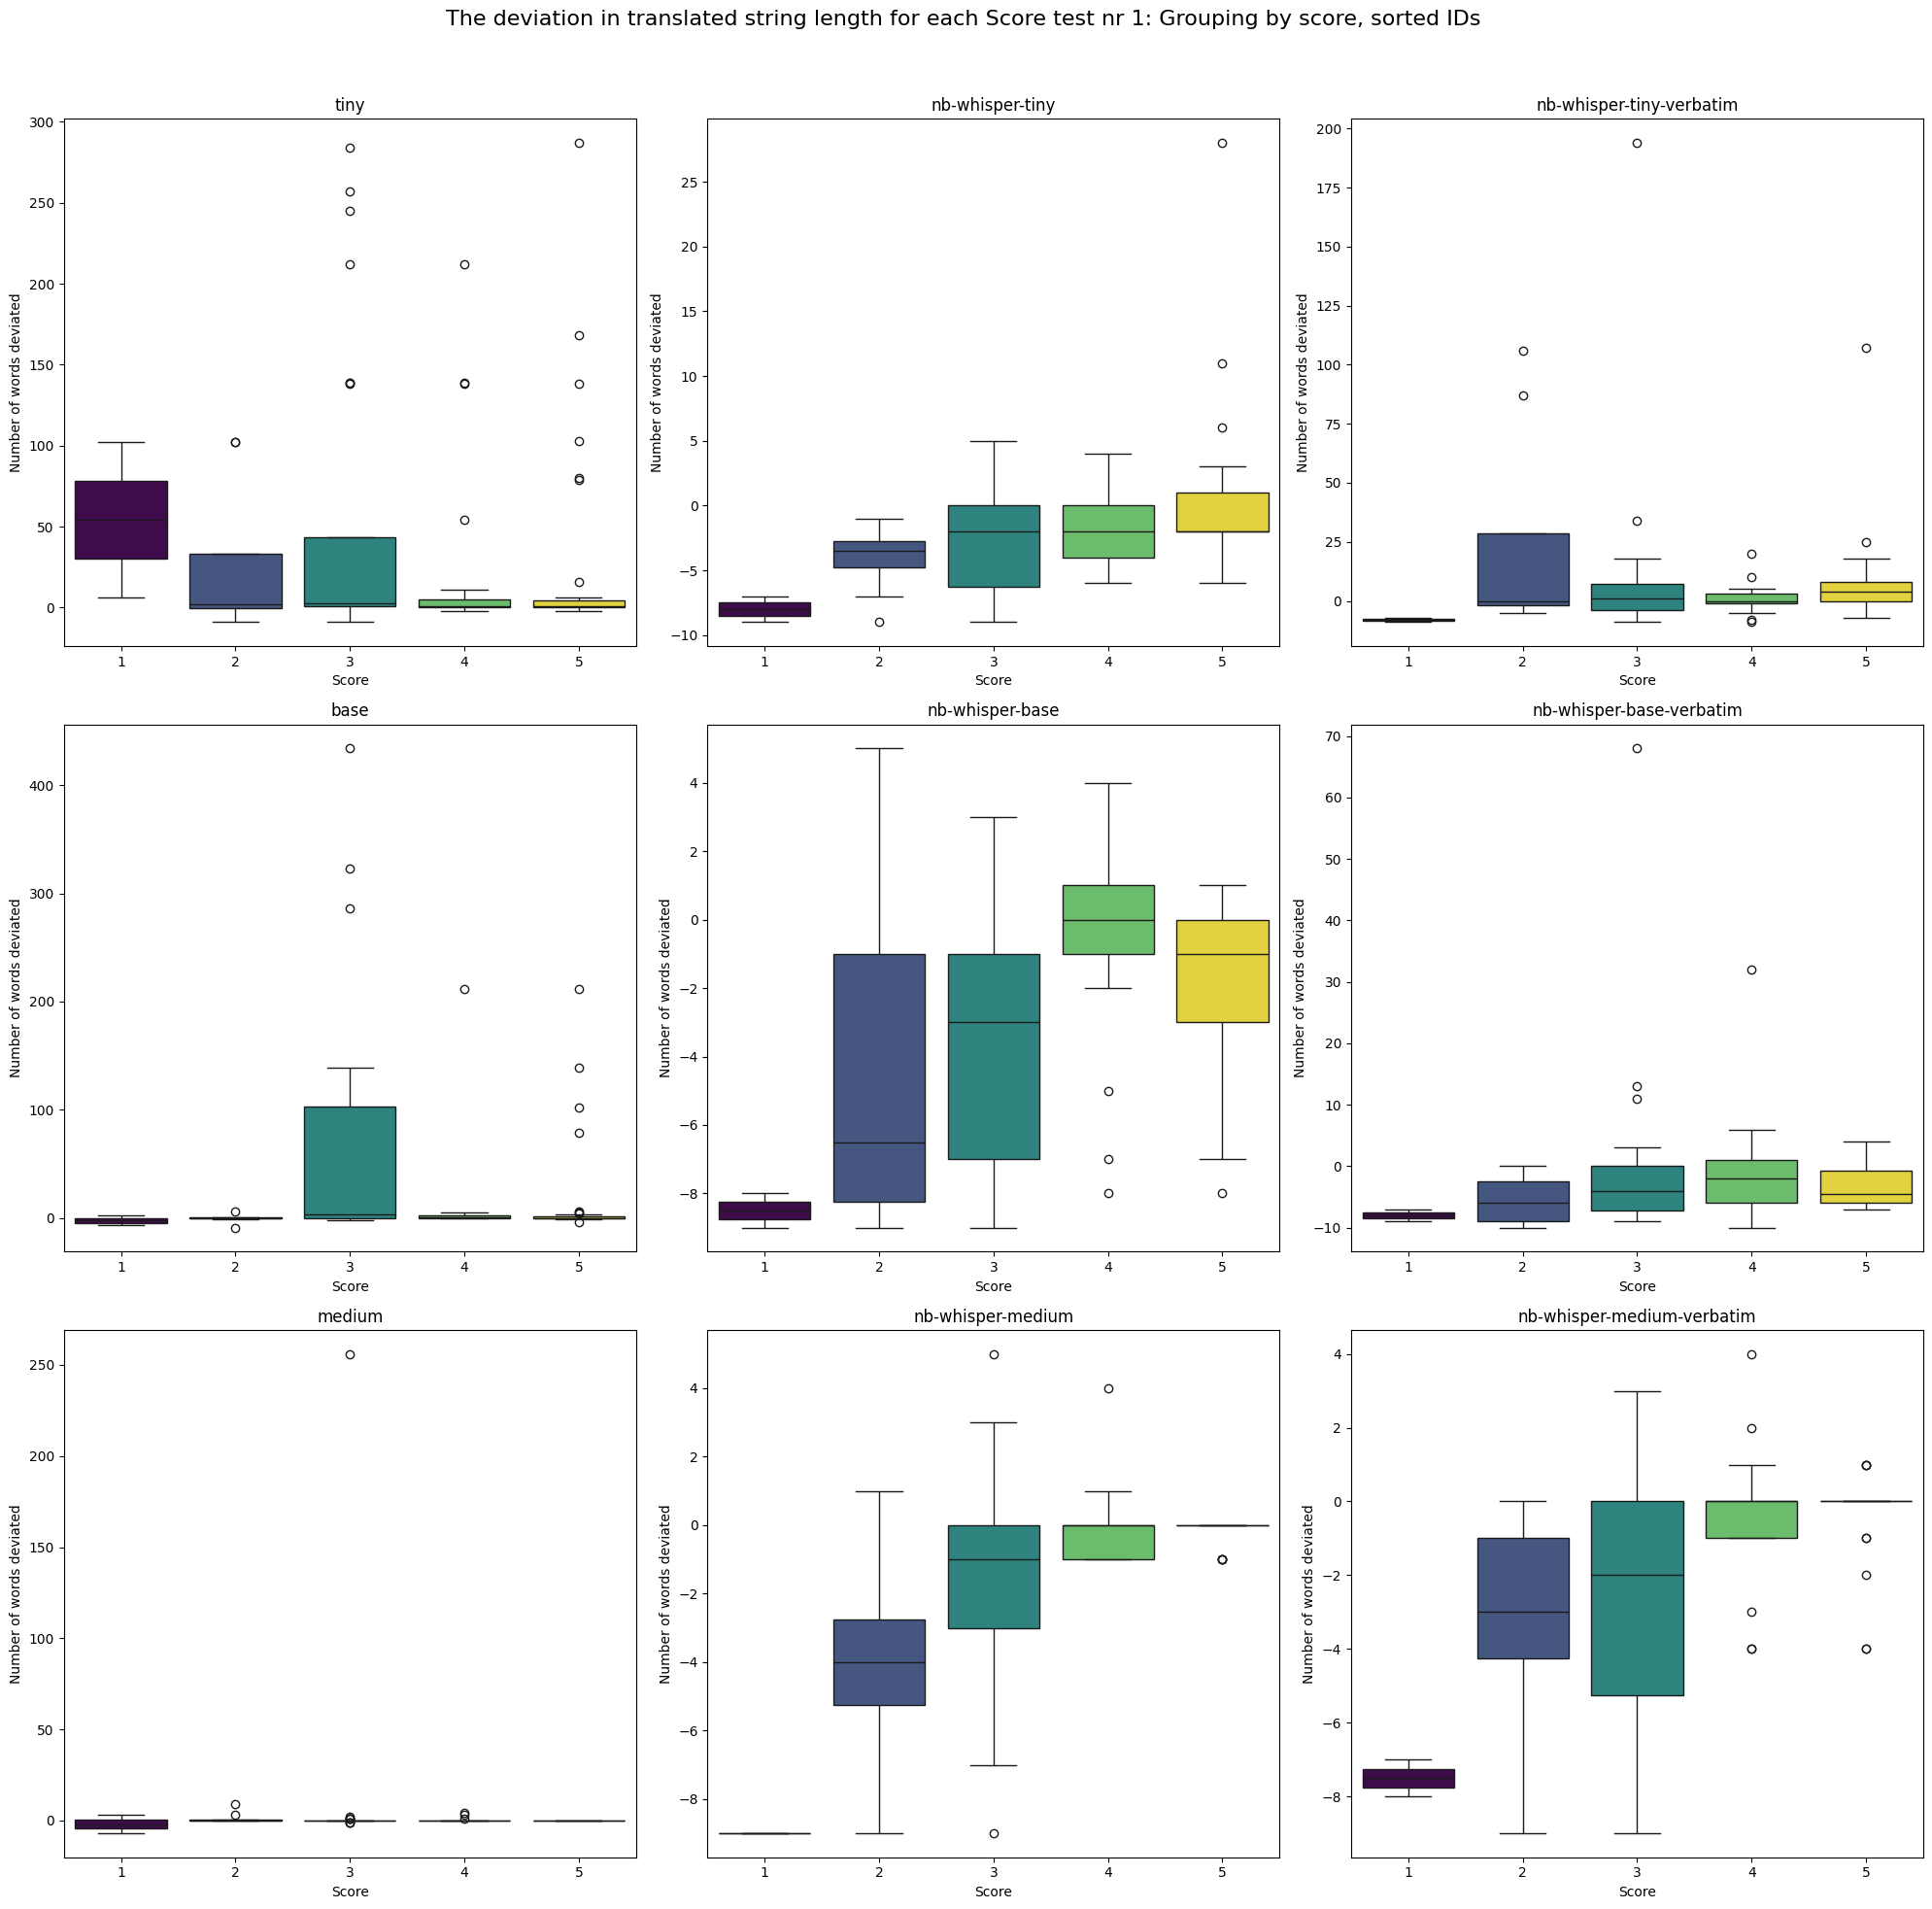

Could not find the file: 3x10_Concatenation_information/nb-whisper-medium-verbatim__concatenated_audio_information_scores_id_mixed_v1.csv


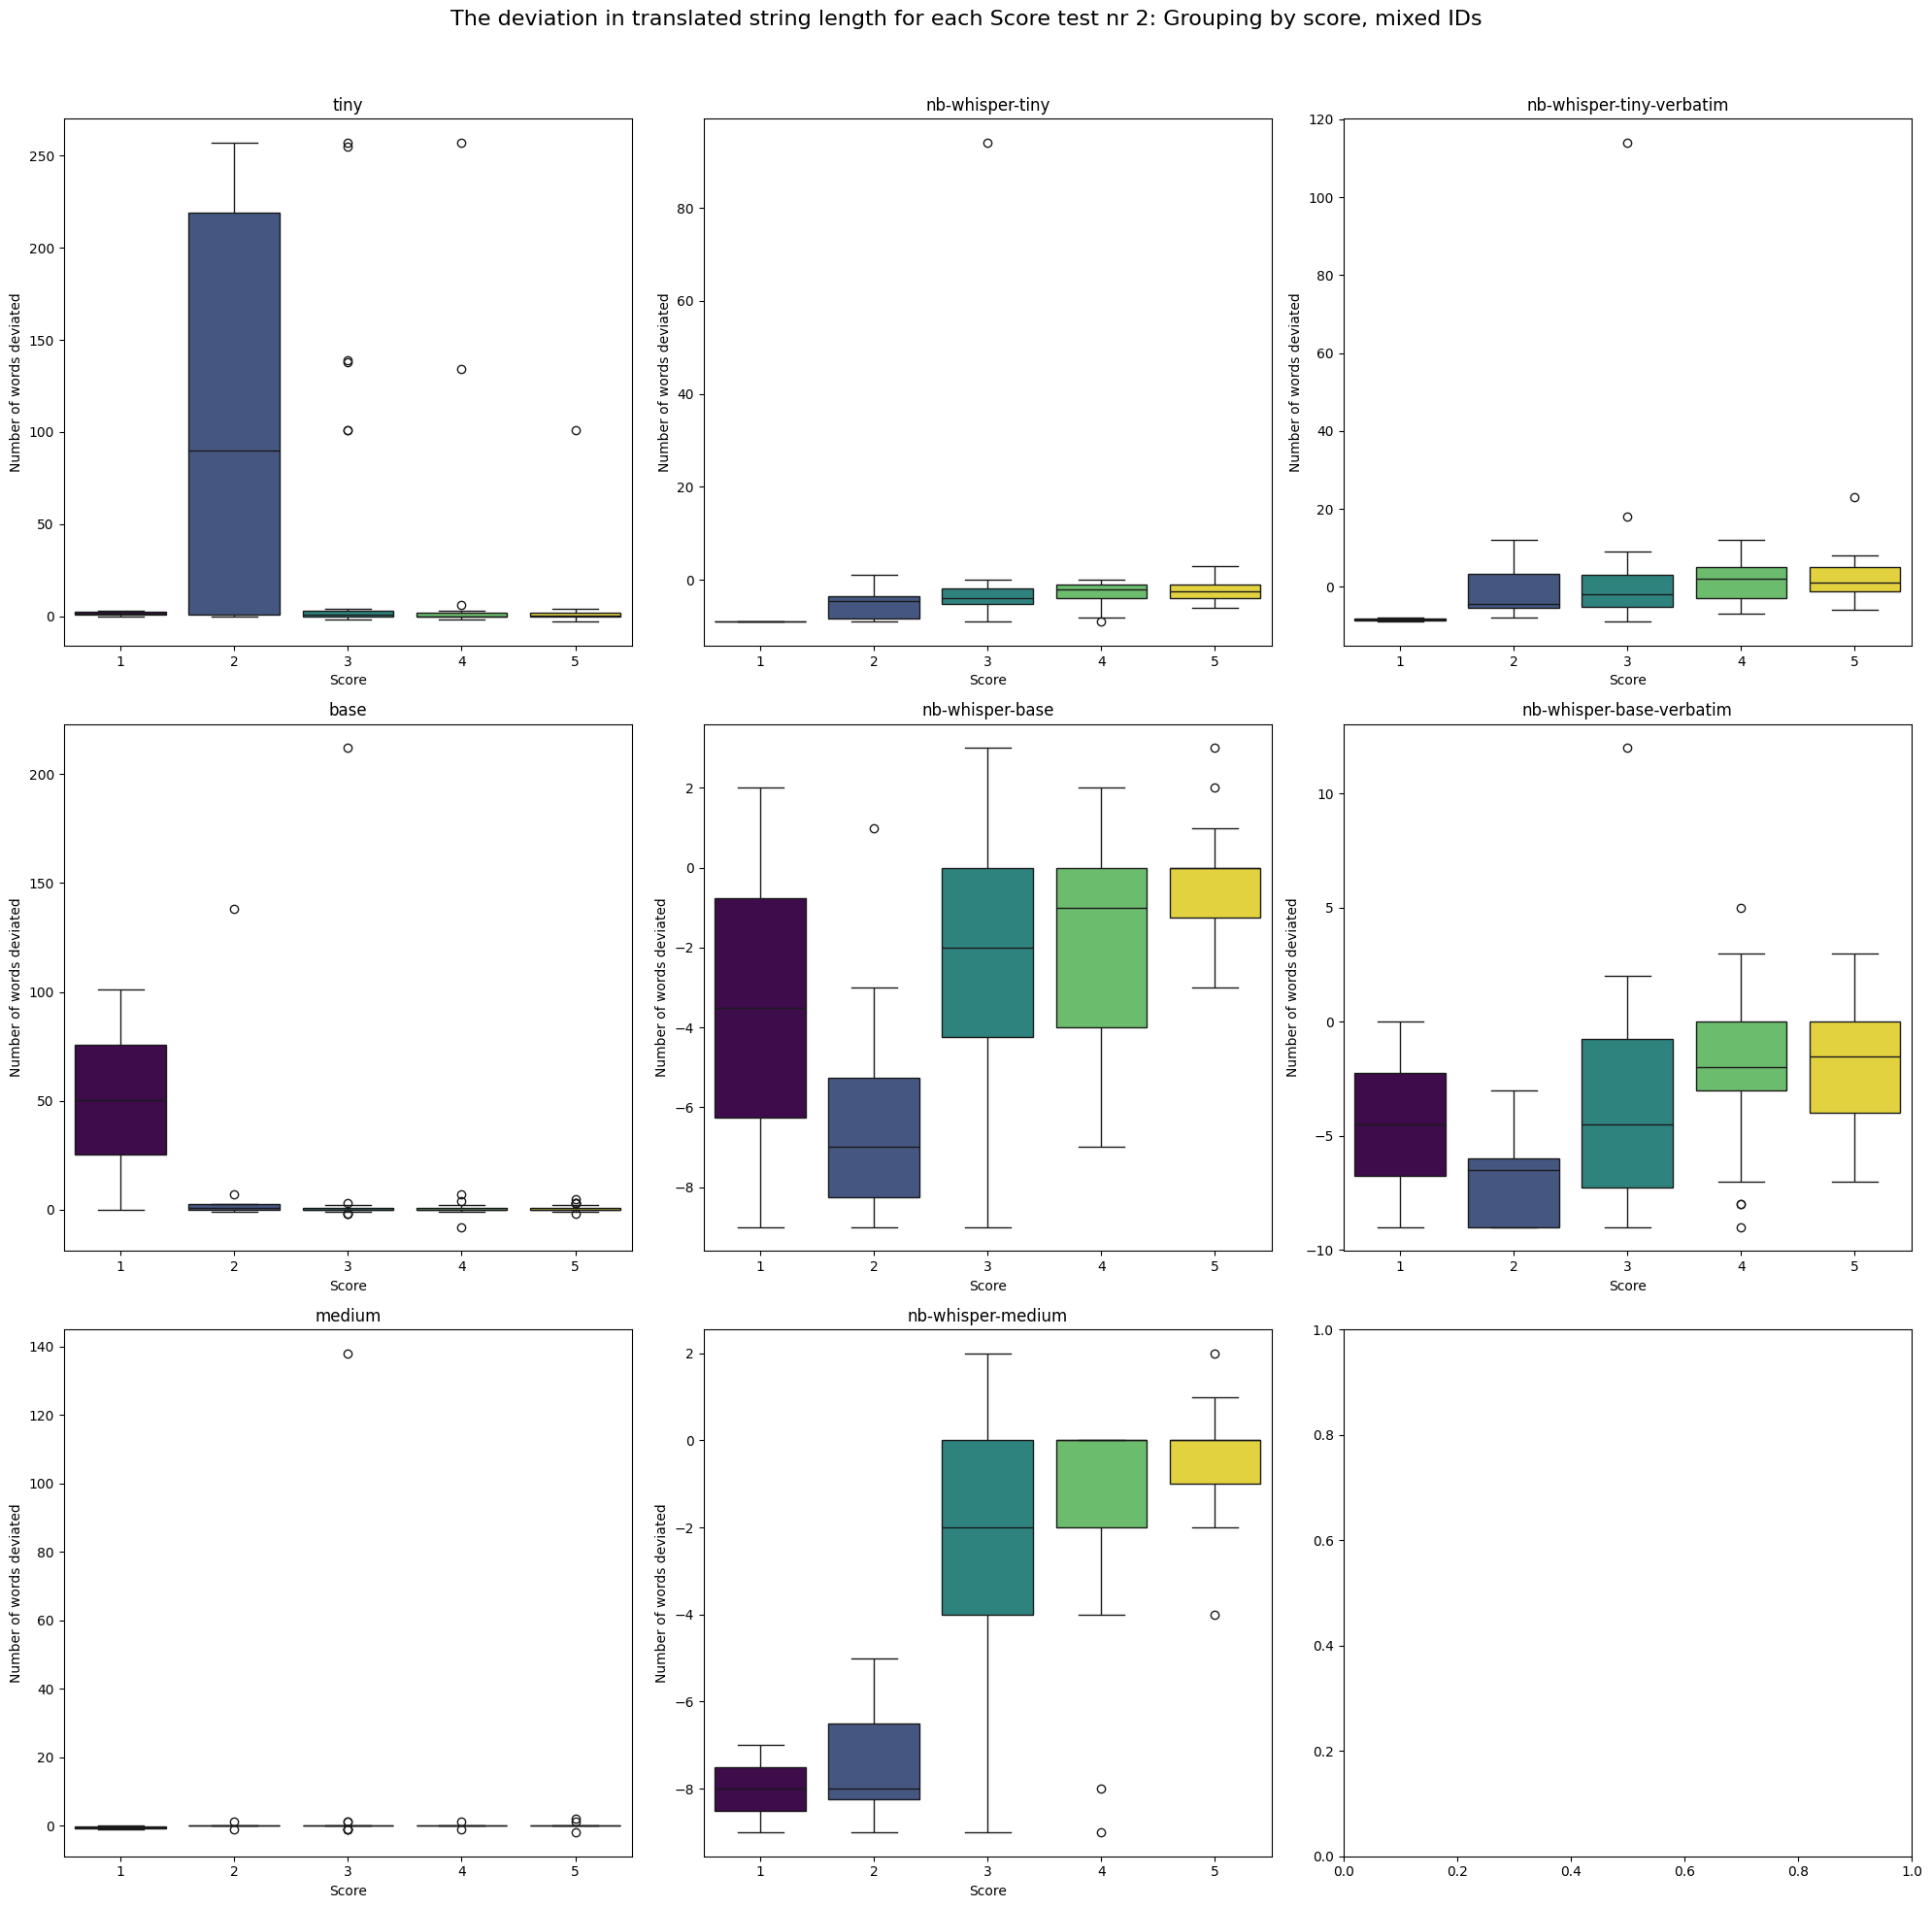

Could not find the file: 3x10_Concatenation_information/nb-whisper-medium-verbatim__concatenated_audio_information_no_group_mixed_v1.csv


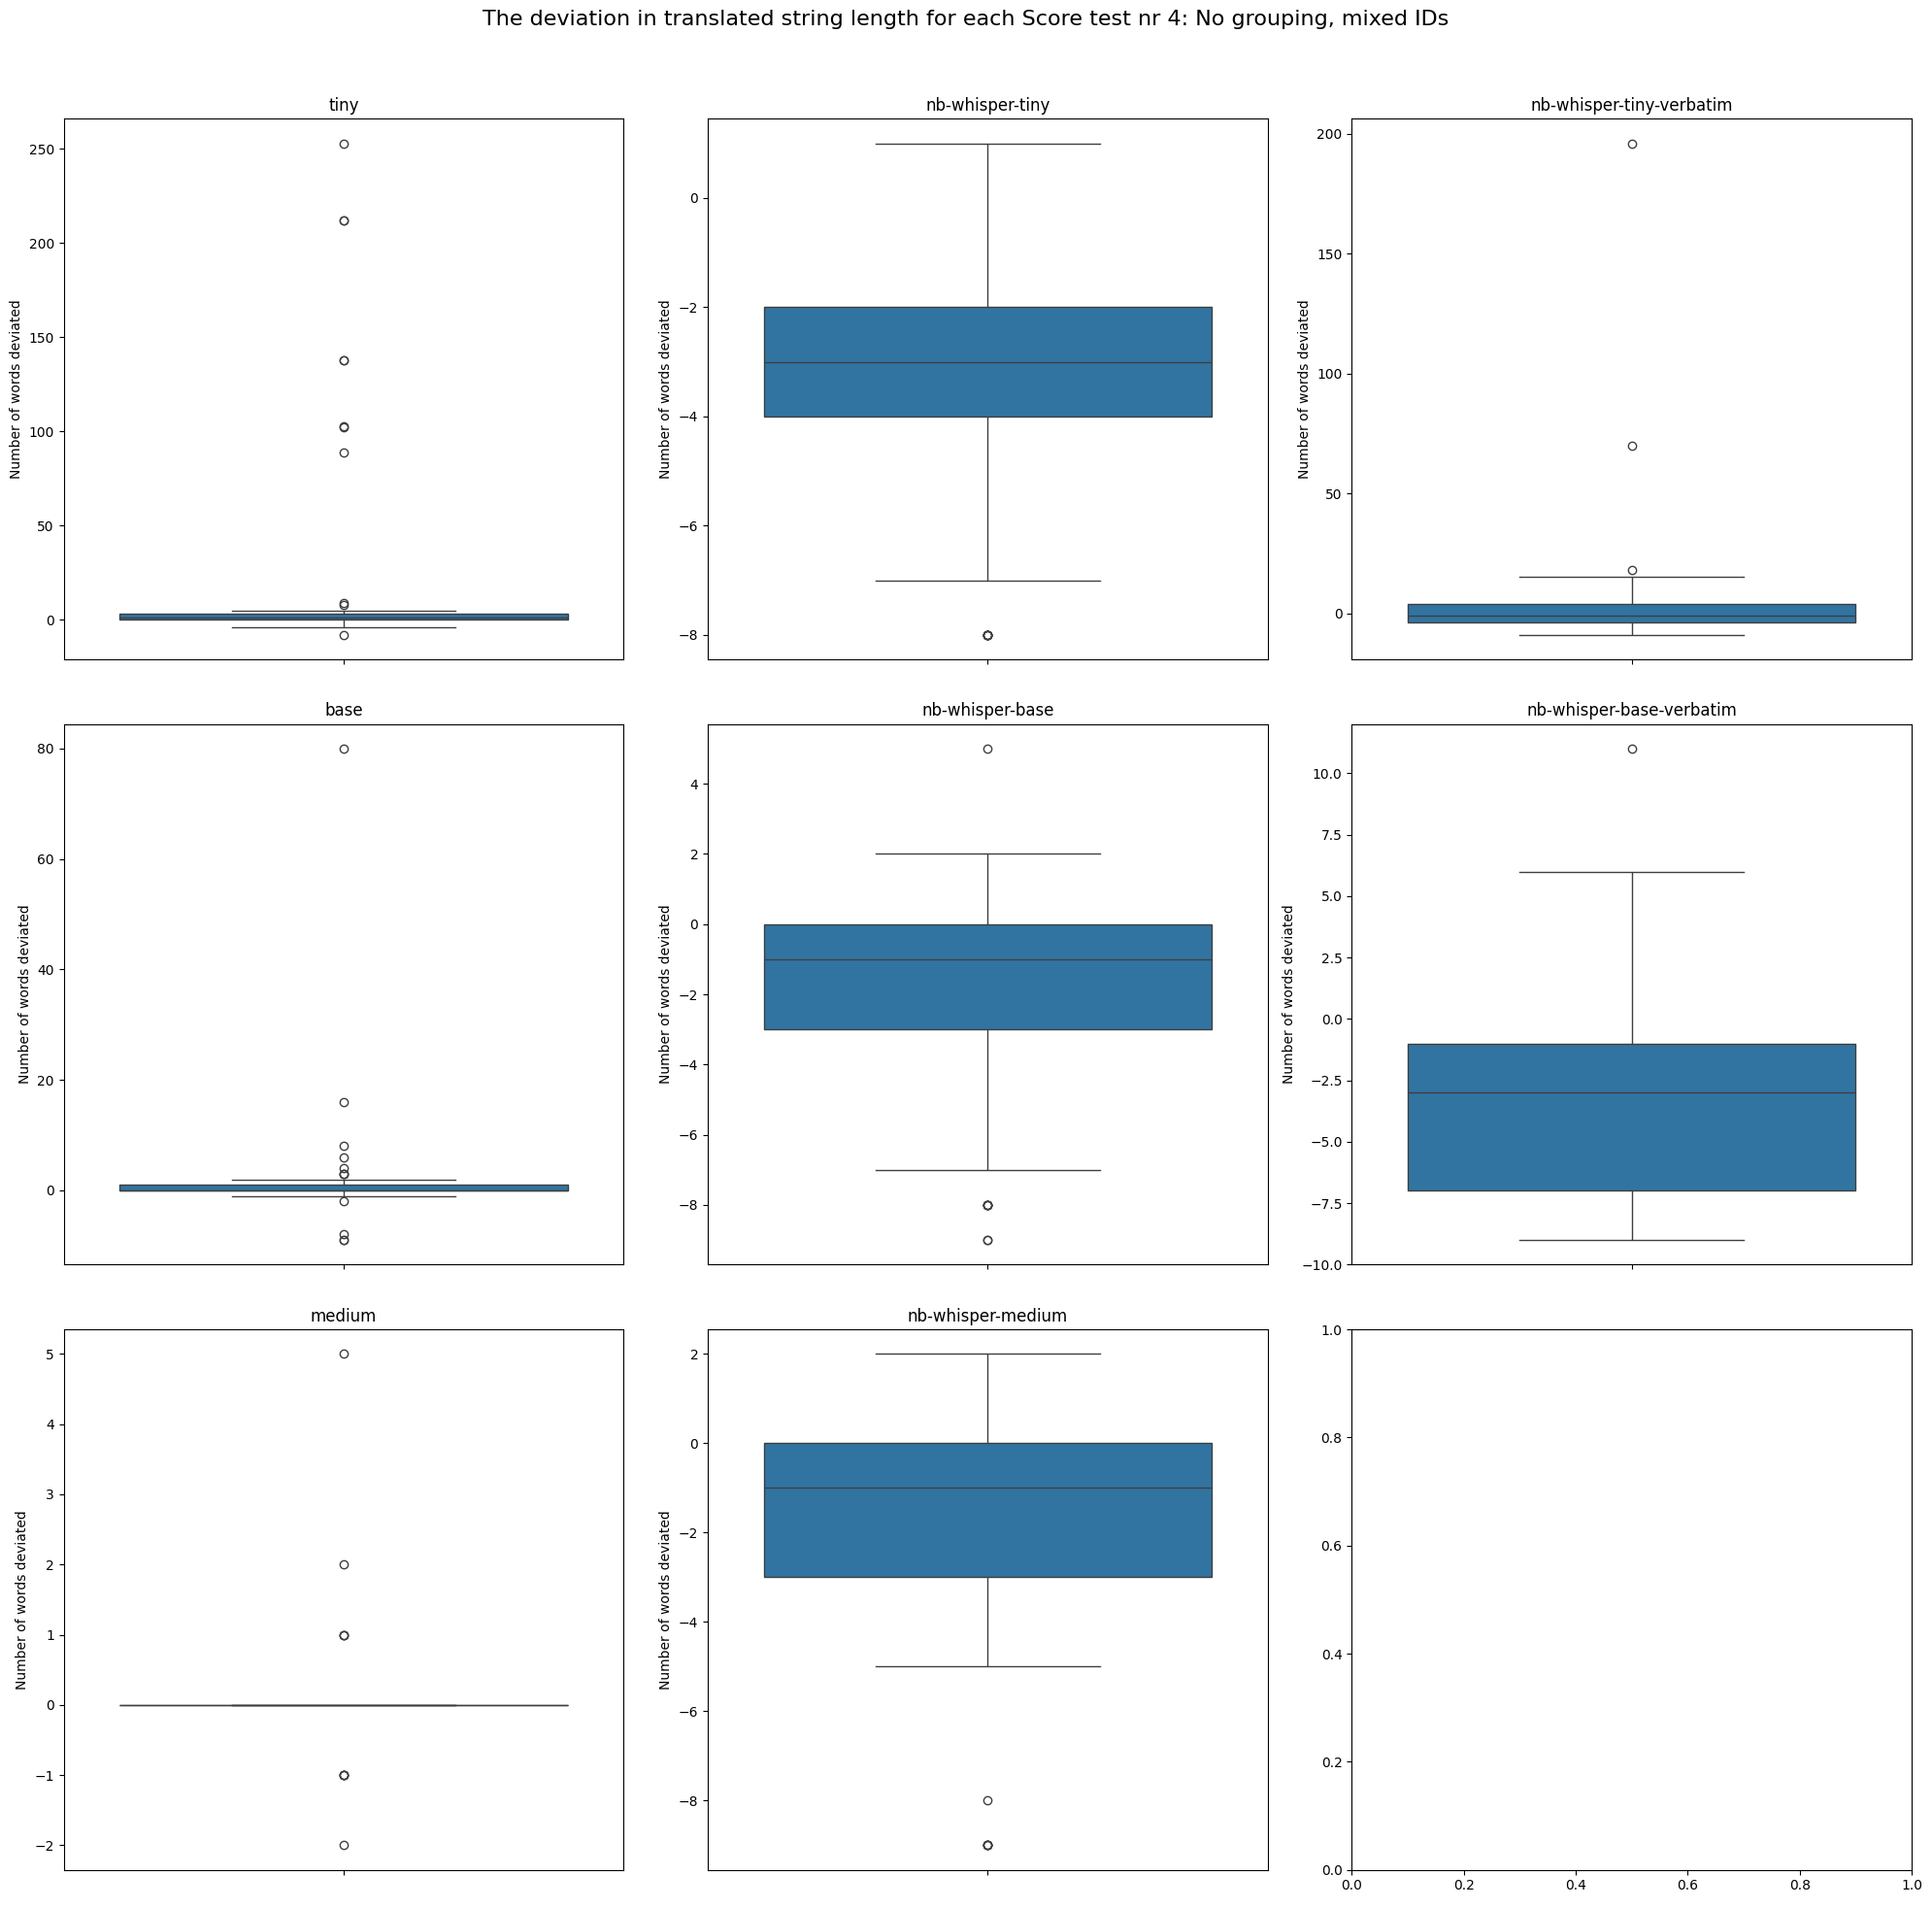

In [59]:
output_dir = 'box_plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

test = [0, 1, 3]
for test_nr in test:
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
    fig.suptitle(f'The deviation in translated string length for each Score test nr {test_nr+1}: {test_names[test_nr]}', fontsize=16)
    palette = 'viridis'
    
    for i, model in enumerate(models):
        row = i // 3
        col = i % 3
        file_name = os.path.join(info_dir, model + different_tests[test_nr] + '_v1.csv')
        try:
            df = pd.read_csv(file_name)
            ax[row, col].set_title(model)
            
            
            ax[row, col].set_ylabel('Number of words deviated')
            # sns.boxplot(ax=ax[row, col], x='score', y='length_deviation_words', data=df, hue='score', palette=palette, legend=False)
            if test_nr == 3:
                ax[row, col].set_xlabel(' ')
                sns.boxplot(ax=ax[row, col], y='length_deviation_words', data=df)
            else:
                ax[row, col].set_xlabel('Score')
                sns.boxplot(ax=ax[row, col], x='score', y='length_deviation_words', data=df, hue='score', palette=palette, legend=False)
            
        except FileNotFoundError:
            print(f'Could not find the file: {file_name}')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    
    output_file = os.path.join(output_dir, f'{different_tests[test_nr]}.png')
    plt.savefig(output_file)
    
    plt.show()


In [8]:
scores_id_sorted[scores_id_sorted['length_deviation_words']<0]

,score,input_string,translated_string,translated_CER,translated_WER,target_CER,target_CER_sum,target_WER,unique_id's,speaker_id's,length_deviation_words,audio_name,audio_path,trans_CER,trans_WER
6,2,bjørn artist søt terning løve horn glorie glad...,jeg fikk det som laksen hva er det?,NaN,NaN,"[0.5, 0.6, 0.3333333333333333, 0.6, 0.5, 0.333...",4.866667,1.0,"['d09', 'd08']","['d09', 'd09', 'd09', 'd09', 'd09', 'd08', 'd0...",-2,words_40_50.wav,../3x10_Concatenations/3x10_score_2_sorted,0.7377049180327869,1.0
7,2,barn flette drue skjema smart vindu tralle mun...,og,NaN,NaN,"[0.3333333333333333, 0.6, 0.5, 0.0, 0.25, 0.6,...",4.050000,0.9,"['d07', 'd08', 'd06']","['d08', 'd08', 'd08', 'd08', 'd08', 'd08', 'd0...",-9,words_50_60.wav,../3x10_Concatenations/3x10_score_2_sorted,0.9830508474576272,1.0
13,3,skjerf skjema svart kran turn trylle troll tre...,halt! hva? gland! gland! gland! gland! gland! ...,NaN,NaN,"[0.75, 0.75, 0.75, 0.75, 0.6666666666666666, 0...",7.233333,1.0,['d19'],"['d19', 'd19', 'd19', 'd19', 'd19', 'd19', 'd1...",-2,words_30_40.wav,../3x10_Concatenations/3x10_score_3_sorted,0.8166666666666667,1.0
14,3,mus løpe kurv skip kropp skilpadde sjiraff plu...,når vikører påkører påklopsyll på måsyll på må...,NaN,NaN,"[0.6666666666666666, 0.75, 0.75, 0.66666666666...",7.597619,1.0,"['d19', 'd18']","['d19', 'd19', 'd19', 'd19', 'd19', 'd19', 'd1...",-1,words_40_50.wav,../3x10_Concatenations/3x10_score_3_sorted,0.7936507936507936,1.0
15,3,garn horn hus barn fortau drikke sky skjerf kv...,gårn hvor? hvor? hvor? hvor? hvor? hvor? hvor?...,NaN,NaN,"[0.6666666666666666, 0.6666666666666666, 0.666...",6.766667,1.0,['d18'],"['d18', 'd18', 'd18', 'd18', 'd18', 'd18', 'd1...",-1,words_50_60.wav,../3x10_Concatenations/3x10_score_3_sorted,0.6607142857142857,1.0
32,3,brun flagg flue enhjørning sølv sport søle sma...,rien,NaN,NaN,"[0.75, 0.75, 0.75, 0.8571428571428571, 0.66666...",6.773810,1.0,['d09'],"['d09', 'd09', 'd09', 'd09', 'd09', 'd09', 'd0...",-9,words_220_230.wav,../3x10_Concatenations/3x10_score_3_sorted,0.9354838709677419,1.0
38,4,vindu glad garn kikkert klem hund jern huske f...,wind blam blam checket blam wind blam blam,NaN,NaN,"[0.8, 0.6666666666666666, 0.6666666666666666, ...",7.816667,1.0,['d19'],"['d19', 'd19', 'd19', 'd19', 'd19', 'd19', 'd1...",-2,words_0_10.wav,../3x10_Concatenations/3x10_score_4_sorted,0.625,1.0
69,5,glør fugl glass gartner hjort kø hund krabbe f...,gle sølg blas gartner jutt hjent krabbe krabbe...,NaN,NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",10.000000,1.0,['d18'],"['d18', 'd18', 'd18', 'd18', 'd18', 'd18', 'd1...",-1,words_60_70.wav,../3x10_Concatenations/3x10_score_5_sorted,0.41509433962264153,0.7
76,5,smykke smør smerte smart skulder skøyter skjør...,smirke smer smerte smart skilder fjett start s...,NaN,NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",10.000000,1.0,['d18'],"['d18', 'd18', 'd18', 'd18', 'd18', 'd18', 'd1...",-1,words_130_140.wav,../3x10_Concatenations/3x10_score_5_sorted,0.3181818181818182,0.7
78,5,synge sykkel syk svømme skjerm vindu skjema ly...,sikkel sik svennne førm vind førm vind ödda,NaN,NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",10.000000,1.0,['d18'],"['d18', 'd18', 'd18', 'd18', 'd18', 'd18', 'd1...",-2,words_150_160.wav,../3x10_Concatenations/3x10_score_5_sorted,0.5818181818181818,1.0
